In [1]:
# we will import all libraries that we need.
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Reading the Data :

In [39]:
df = pd.read_csv("Medical insurance Data.csv", skiprows=1)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### There is no missing data.

In [4]:
df.describe(include= 'all')

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


In [5]:
df.shape

(1338, 7)

# Exploratory Data Analysis :

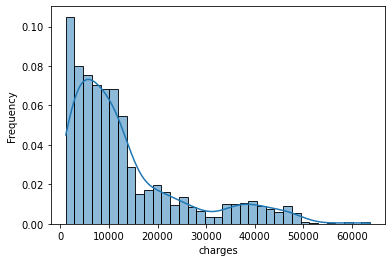

In [6]:
sns.histplot(df['charges'], kde=True,bins=35, stat='frequency');
#plt.savefig("charges.png", dpi=100)

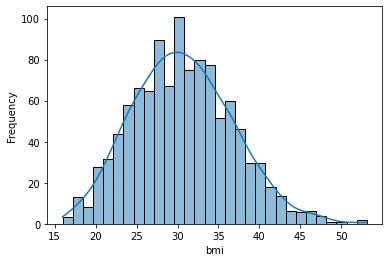

In [7]:
sns.histplot(df['bmi'], kde=True,bins=30, stat='frequency');
#plt.savefig("BMI.png", dpi=100)

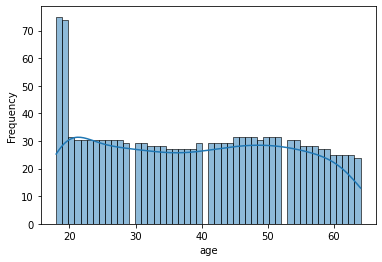

In [8]:
sns.histplot(df['age'], kde=True,bins=50, stat='frequency');
#plt.savefig("Age.png", dpi=100)

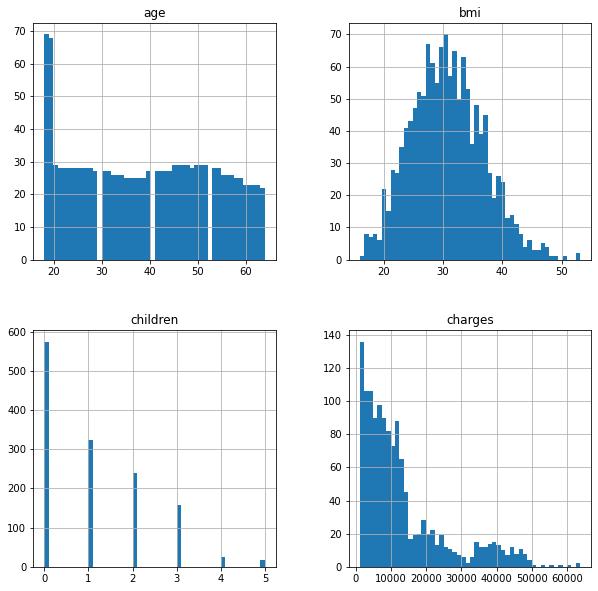

In [9]:
df.hist(bins=50, figsize=(10,10));

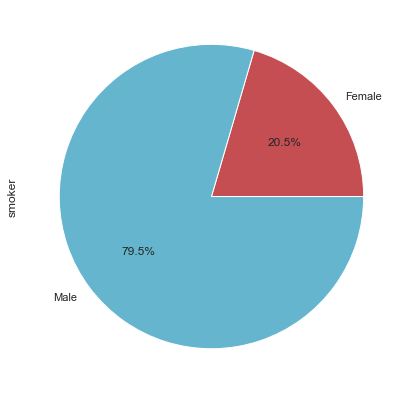

In [44]:
#mycolors = ["r", "c"]
#mylabels = ["Female", "Male"]
df.smoker.value_counts(sort=False).plot.pie(labels = mylabels, figsize=(7,7), autopct='%1.1f%%', colors = mycolors)
#plt.legend()
#plt.title("Gender",color='r',fontsize = 15)
#plt.ylabel("Gender", color="black", fontsize = 15)
plt.show()

Text(0, 0.5, '')

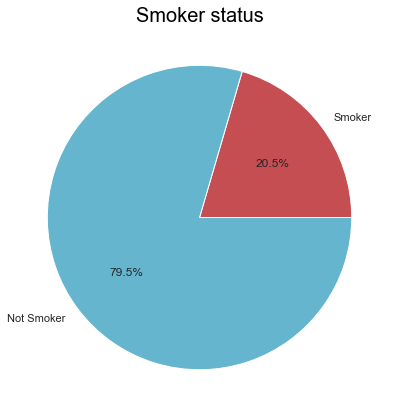

In [54]:
mycolors = ["r", "c"]
mylabels = ["Smoker", "Not Smoker"]
plt.title("Smoker status",color='Black',fontsize = 20)
df.smoker.value_counts(sort=False).plot.pie(labels = mylabels, figsize=(7,7), autopct='%1.1f%%', colors = mycolors)
plt.ylabel("", color="black", fontsize = 15)

C:\Users\ssq12\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of Charges')

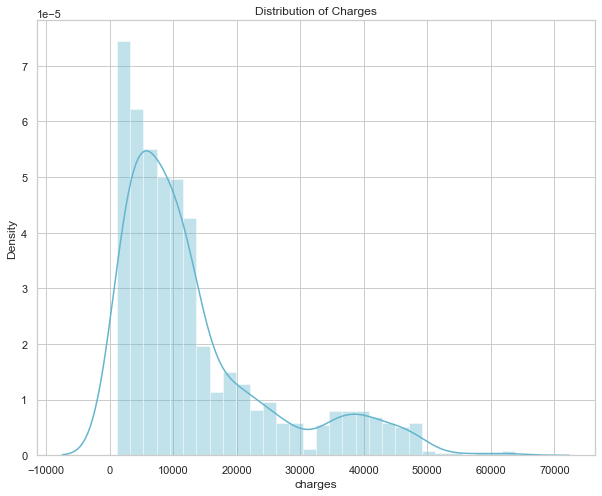

In [11]:
sns.set(style='whitegrid')
f, ax = plt.subplots(1,1, figsize=(10, 8))
ax = sns.distplot(df['charges'], kde = True, color = 'c')
plt.title('Distribution of Charges')

## This distribution is right-skewed. To make it closer to normal we can apply natural log.

C:\Users\ssq12\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


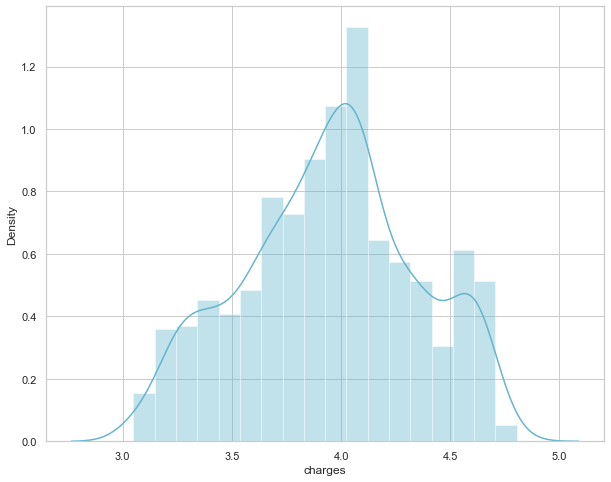

In [12]:
f, ax = plt.subplots(1, 1, figsize=(10, 8))
ax = sns.distplot(np.log10(df['charges']), kde = True, color = 'c' )

### Now let's look at the charges by region.

C:\Users\ssq12\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


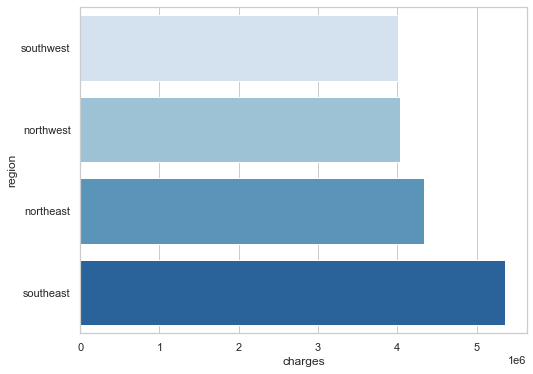

In [13]:
charges = df['charges'].groupby(df.region).sum().sort_values(ascending = True)
f, ax = plt.subplots(1, 1, figsize=(8, 6))
ax = sns.barplot(charges.head(), charges.head().index, palette='Blues')

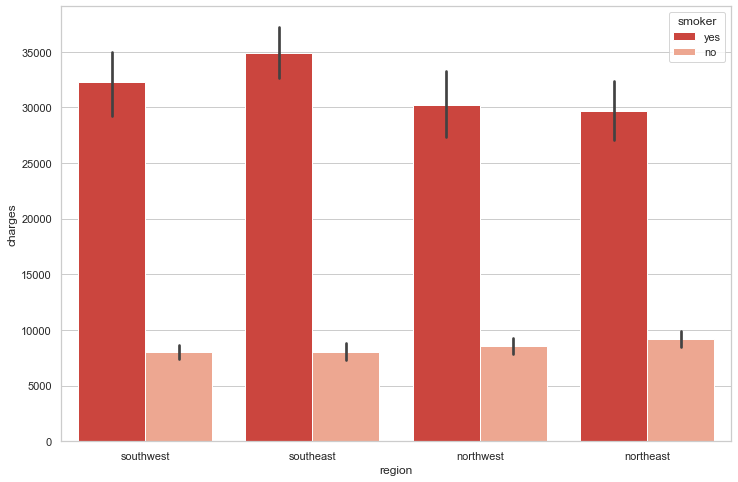

In [14]:
f, ax = plt.subplots(1,1, figsize=(12,8))
ax = sns.barplot(x = 'region', y = 'charges',
                 hue='smoker', data=df, palette='Reds_r')

### Dummy Variables :

In [15]:
from sklearn.preprocessing import LabelEncoder

In [57]:
label = LabelEncoder()
label.fit(df.sex.drop_duplicates())
df.sex = label.transform(df.sex)
label.fit(df.smoker.drop_duplicates())
df.smoker = label.transform(df.smoker)
label.fit(df.region.drop_duplicates())
df.region = label.transform(df.region)
df.dtypes

age           int64
sex           int32
bmi         float64
children      int64
smoker        int32
region        int32
charges     float64
dtype: object

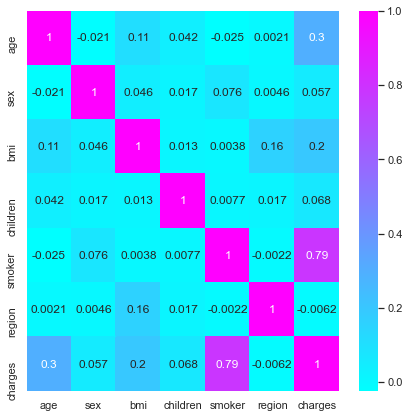

In [58]:
f, ax = plt.subplots(1, 1, figsize=(7, 7))
ax = sns.heatmap(df.corr(), annot=True, cmap='cool')
#plt.savefig("Heat Map.png", dpi=100)

In [ ]:
from sklearn import preprocessing 

##  Find candidate models (e.g., linear- polynomial - ridge -lasso)

In [18]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import preprocessing
from sklearn.model_selection import train_test_split as holdout
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.linear_model import Ridge

### Split the Data  :
#### 80% training,  20% testing.
####  100% training >> 80% training 20% validation.

In [19]:
x = df.drop(['charges'], axis = 1)
y = df['charges']

In [20]:
x_train, x_test, y_train, y_test = holdout(x, y, test_size=0.2, random_state=0)

In [21]:
x_traind, x_val, y_traind, y_val = holdout(x_train, y_train, test_size=0.2, random_state=3)

## Linear Regression :

In [25]:
lm = LinearRegression()
lm.fit(x_traind, y_traind)
print(lm.intercept_)
print(lm.coef_)
print(lm.score(x_val, y_val))

-12120.095895730501
[  249.31544603   226.09941496   349.54825102   597.99506558
 23272.09889754  -419.92482967]
0.7194375218367793


In [ ]:
model = sm.OLS(y_test, x_test)
fit = model.fit()
fit.summary()

In [ ]:
#kf_Linear = KFold(n_splits=5, shuffle=True, random_state = 71)
#cross_val_score(lm, x_traind, y_traind, cv=kf, scoring='r2').mean()

## Ridge Regression :

In [22]:
from sklearn.linear_model import Ridge
Ridge = Ridge(alpha=-8)
Ridge.fit(x_traind, y_traind)
print(Ridge.intercept_)
print(Ridge.coef_)
print(Ridge.score(x_val, y_val))

-12467.223742730479
[  251.00292826   151.27730211   349.99871209   576.44017478
 24719.58271275  -397.26433731]
0.7219769047897138


In [ ]:
#kf_Ridge = KFold(n_splits=5, shuffle=True, random_state = 71)
#cross_val_score(Ridge, x_traind, y_traind, cv=kf, scoring='r2').mean()

## Lasso Regression:

In [26]:
from sklearn.linear_model import Lasso
Lasso = Lasso(alpha=60, fit_intercept=True, normalize=False, precompute=False, max_iter=1000,
              tol=0.0001, warm_start=False, positive=False, random_state=None, selection='cyclic')
Lasso.fit(x_traind, y_traind)
print(Lasso.intercept_)
print(Lasso.coef_)
print(Lasso.score(x_val, y_val))

-11892.60054360098
[ 2.49165186e+02  7.80546066e+00  3.46887452e+02  5.62819322e+02
  2.29295191e+04 -3.70876827e+02]
0.720232557226749


In [ ]:
from sklearn.linear_model import LassoCV
from sklearn.datasets import make_regression
x_train, x_train = make_regression(noise=4, random_state=71)
reg = LassoCV(cv=5, random_state=0).fit(x_traind,y_traind)
reg.score(x_val, y_val)

## Polynomial Regression :

In [75]:
x = df.drop(['charges','sex', 'region'], axis = 1)
y = df.charges
pol = PolynomialFeatures (degree = 2)
x_pol = pol.fit_transform(x)
x_traind, x_val, y_traind, y_val = holdout(x_pol, y, test_size=0.2, random_state=0)
Pol_reg = LinearRegression(normalize=True)
Pol_reg.fit(x_traind, y_traind)
y_train_pred = Pol_reg.predict(x_traind)
y_val_pred = Pol_reg.predict(x_val)
print(Pol_reg.intercept_)
print(Pol_reg.coef_)
print(Pol_reg.score(x_val, y_val))

-5325.88170525323
[ 0.00000000e+00 -4.01606591e+01  5.23702019e+02  8.52025026e+02
 -9.52698471e+03  3.04430186e+00  1.84508369e+00  6.01720286e+00
  4.20849790e+00 -9.38983382e+00  3.81612289e+00  1.40840670e+03
 -1.45982790e+02 -4.46151855e+02 -9.52698471e+03]
0.8812595703345233


In [ ]:
#kf_Polynomial = KFold(n_splits=5, shuffle=True, random_state = 71)
#cross_val_score(Pol_reg, x_traind, y_traind, cv=kf, scoring='r2').mean()

##  Random Forest Regressor :

In [ ]:
'''
from sklearn.ensemble import RandomForestRegressor as rfr
x = df.drop(['charges'], axis=1)
y = df.charges
Rfr = rfr(n_estimators = 100, criterion = 'mse',
                              random_state = 1,
                              n_jobs = -1)
Rfr.fit(x_traind,y_traind)
x_train_pred = Rfr.predict(x_traind)
x_test_pred = Rfr.predict(x_val)

print('MSE train data: %.3f, MSE test data: %.3f' % 
      (metrics.mean_squared_error(x_train_pred, y_traind),
       metrics.mean_squared_error(x_test_pred, y_val)))
print('R2 train data: %.3f, R2 test data: %.3f' % 
      (metrics.r2_score(y_train,x_train_pred, y_traind),
       metrics.r2_score(y_test,x_test_pred, y_val)))
'''


In [ ]:
#kf_RandomForest = KFold(n_splits=5, shuffle=True, random_state = 71)
#cross_val_score(Rfr, x_traind, y_traind, cv=kf, scoring='r2').mean()

In [78]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_val_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_val_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_val_pred)))

Mean Absolute Error: 2824.4950454776545
Mean Squared Error: 18895160.09878032
Root Mean Squared Error: 4346.856346692437


In [77]:
#y_test_pred = Pol_reg.predict(x_test)
##Comparing the actual output values with the predicted values
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_val_pred})
df1.sample(5)


,Actual,Predicted
1217,4058.11610,6290.602385
1146,52590.82939,41324.837891
362,13844.50600,14301.959222
253,4260.74400,6642.507149
1056,8277.52300,9612.483495


In [ ]:
from sklearn.model_selection import cross_val_score
lm = LinearRegression()

cross_val_score(lm, x, y, # estimator, features, target
                cv=5, # number of folds 
                scoring='r2') # scoring metric

In [ ]:
kf = KFold(n_splits=5, shuffle=True, random_state = 71)
cross_val_score(lm, x, y, cv=kf, scoring='r2').mean()

In [ ]:
Lasso = Lasso()
kf = KFold(n_splits=5, shuffle=True, random_state = 71)
cross_val_score(Lasso, x, y, cv=kf, scoring='r2')

In [ ]:
kf = KFold(n_splits=5, shuffle=True, random_state = 1000)
lm_reg = Ridge(alpha=1)
print(np.mean(cross_val_score(lm, x, y, cv=kf, scoring='r2')))
print(np.mean(cross_val_score(lm_reg, x, y, cv=kf, scoring='r2')))
print(np.mean(cross_val_score(Lasso, x, y, cv=kf, scoring='r2')))

In [59]:
lm.fit(x_train, y_train)
print(f'Linear Regression val R^2: {lm.score(x_test, y_test):.3f}')

Ridge.fit(x_train, y_train)
print(f'Ridge Regression val R^2: {Ridge.score(x_test, y_test):.3f}')

Pol_reg.fit(x_train, y_train)
print(f'Degree 2 polynomial regression val R^2: {Pol_reg.score(x_test, y_test):.3f}')

Lasso.fit(x_train, y_train)
print(f'Lasso Regression val R^2: {Lasso.score(x_test, y_test):.3f}')

#Rfr.fit(x_train, y_train)
#print(f'Random Forest Regressor regression val R^2: {Rfr.score(x_test, y_test):.3f}')

Linear Regression val R^2: 0.800
Ridge Regression val R^2: 0.801
Degree 2 polynomial regression val R^2: 0.800
Lasso Regression val R^2: 0.798
